In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def getPrefactor(modeled=False):
    if modeled:
        return 0.01
    else:
        return 0.04

def yearAdjustment(yr):
    return np.sqrt(10/yr)

def photo_z_err(m,y,redshift):
    return (1+redshift) * yearAdjustment(y) * getPrefactor(m) * z_cutoff(redshift)

In [3]:
key_yrs = [1,4,7,10]
z_step=0.01
z_range=np.arange(0,1.5+z_step,step=z_step)
modeled = [False,True]
colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728"]
ls = ['-','-.']

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1005783/1315708722.py:8: SyntaxWarning: invalid escape sequence '\D'
  axs.set_ylabel("$\Delta z$")


(0.0, 1.5)

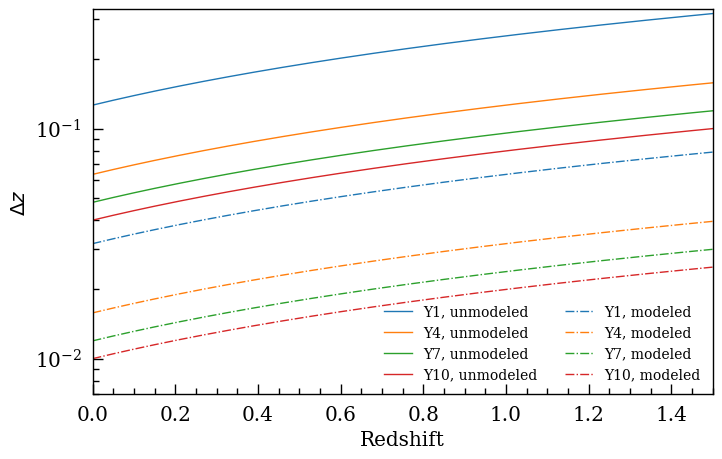

In [4]:
fig,axs = plt.subplots(1,sharex=True,sharey=True,figsize=[8,5])
for m,l in zip(modeled,ls):
    for year,c in zip(key_yrs,colors):
        z_err = []
        for z in z_range:
            z_err.append(photo_z_err(m,year,z))
        axs.plot(z_range,z_err,l,label=f"Y{year}, {'modeled' if m else 'unmodeled'}",c=c)
    axs.set_ylabel("$\Delta z$")
axs.legend(ncols=2,fontsize='medium')
axs.set_xlabel("Redshift")
axs.set_ylim(0.007,0.33)
axs.semilogy()
axs.set_xticks(np.arange(0,1.5,step=0.2))
axs.set_xlim(0,1.5)